In [1]:
# Importing Necessary Libraries 
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv

**PANDAS:-** This is used for data analysis and processing.

**MATPLOTLIB:-** Used to produce line graphs and other visuals.

**SEABORN:-** A powerful statistical plotting library based on Matplotlib library.

**SQLITE:-** This Python library already exists and is used to communicate with SQLite databases. It enables computer creation, connection, and   manipulation of SQLite databases. Table creation, data insertion, SQL query execution, and data retrieval for analysis are examples of common procedures.

**CSV:-** It provides functionality to read and write data to and from CSV files.

## TASK:-  Dataset for Analysis, Relational Database Creation & Database Loading and Data PreprocessingThe DataSet used in this project can be accessed below:-

[Access the Dataset on Kaggle](https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war)

I have taken the Datasets from **Kaggle Datasets** and the name of the datasets is  **2022 Russia Ukraine War**.
warysis.


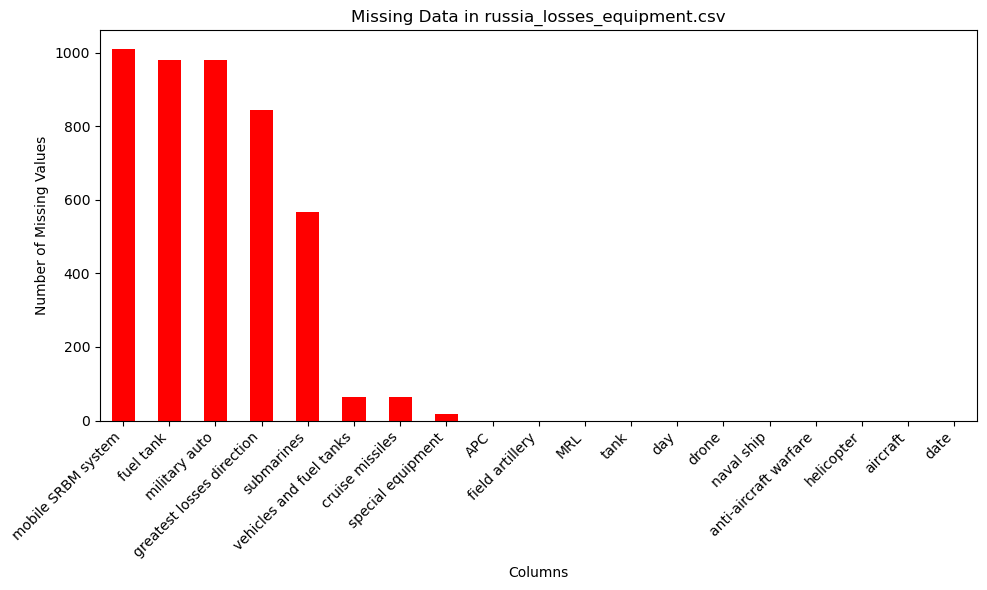

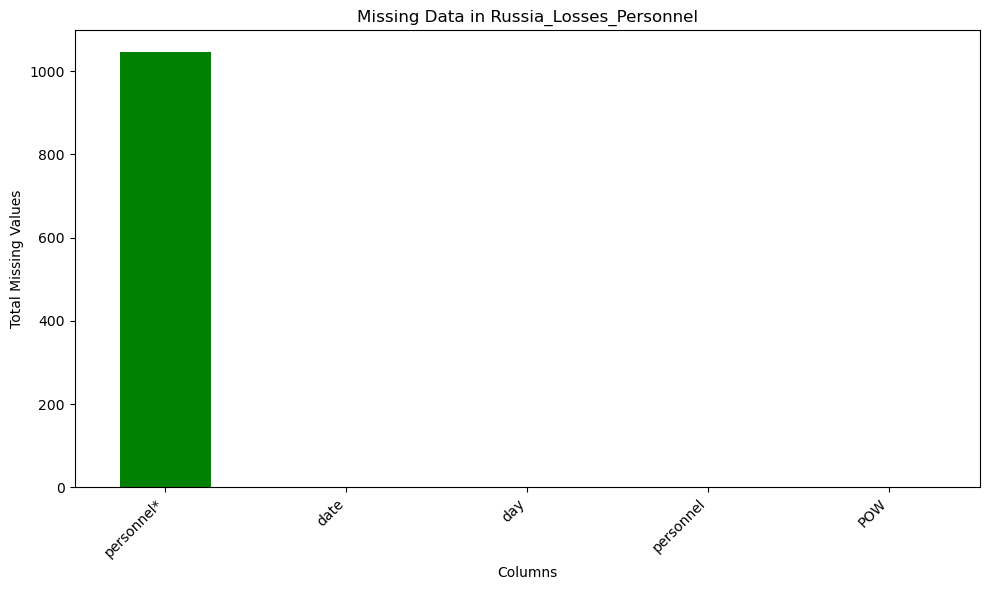

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1046 non-null   object 
 1   day_x                      1046 non-null   int64  
 2   aircraft_x                 1046 non-null   int64  
 3   helicopter_x               1046 non-null   int64  
 4   tank_x                     1046 non-null   int64  
 5   APC_x                      1046 non-null   int64  
 6   field artillery_x          1046 non-null   int64  
 7   MRL_x                      1046 non-null   int64  
 8   drone_x                    1046 non-null   int64  
 9   naval ship_x               1046 non-null   int64  
 10  anti-aircraft warfare_x    1046 non-null   int64  
 11  special equipment_x        1046 non-null   float64
 12  vehicles and fuel tanks_x  1046 non-null   float64
 13  cruise missiles_x          1046 non-null   float

In [4]:
#First step taking DataSet & Creating the file path for it accordingly
equipment_path = 'russia_losses_equipment.csv'
equipment_correction_path = 'russia_losses_equipment_correction.csv'
personnel_path = 'russia_losses_personnel.csv'

#Next is to loading the Datasets & Reading the csv file
equipment_df = pd.read_csv(equipment_path)
equipment_correction_df = pd.read_csv(equipment_correction_path)
personnel_df = pd.read_csv(personnel_path)

# 1st Step: Cleaning the [russia_losses_equipment] csv file
# Summary of the DataSets missing values
equipment_missing = equipment_df.isnull().sum()

#Chart the missing data for the same Dataset
plt.figure(figsize=(10, 6))
#Here sorting the missing values and plotting it to identify 
equipment_missing.sort_values(ascending=False).plot(kind='bar', color='Red')
plt.title('Missing Data in russia_losses_equipment.csv')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Managing values that are missing: 
# Use the median to fill in the remaining numeric values that are missing
threshold = len(equipment_df) * 0.5
columns_to_drop = equipment_missing[equipment_missing > threshold].index
# Removing the columns that have more than 50% missing values
equipment_cleaned = equipment_df.drop(columns=columns_to_drop)

#Use the median to fill in the missing numerical values by inserting columns function
numerical_cols = equipment_cleaned.select_dtypes(include='number').columns
equipment_cleaned[numerical_cols] = equipment_cleaned[numerical_cols].fillna(equipment_cleaned[numerical_cols].median())

# 2nd Step: Cleaning [russia_losses_equipment_correction] csv file
# Checking to see if any corrections have negative values.
correction_negative_values = (equipment_correction_df.select_dtypes(include='number') < 0).sum()

# Making sure that there are no negative corrections, if there are, remove and fix them
equipment_correction_df = equipment_correction_df[(equipment_correction_df.select_dtypes(include='number') >= 0).all(axis=1)]

# 3rd Step: Cleaning [russia_losses_personnel] csv file
# Addressing the [personnel*] column's ambiguity and the [POW] for missing values
personnel_df['personnel*'] = personnel_df['personnel*'].str.replace('about', '').str.strip()
personnel_df['personnel*'] = pd.to_numeric(personnel_df['personnel*'], errors='coerce')
personnel_df['POW'] = personnel_df['POW'].fillna(0)

# Plotting the  missing data for [russia_losses_personnel]
personnel_missing = personnel_df.isnull().sum()
plt.figure(figsize=(10, 6))
personnel_missing.sort_values(ascending=False).plot(kind='bar', color='Green')
plt.title('Missing Data in Russia_Losses_Personnel')
plt.ylabel('Total Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4th Step: Data Integration
# Merging the [equipment_cleaned] with [equipment_correction_df]
equipment_merged = pd.merge(equipment_cleaned, equipment_correction_df, on='date', how='left')

# Utilizing the [date] column to merge the people and equipment information
data_combined = pd.merge(equipment_merged, personnel_df, on='date', how='inner')

# Final Dataset, Cleaned and Integrated
data_combined.info()
data_combined.head()

# Now, the merged and cleansed data can be stored in a CSV file or database
output_path = 'final_cleaned_data.csv'
data_combined.to_csv(output_path, index=False)

### EXPLANATION:- 
The three datasets get a thorough data cleaning, setup, and integration phase carried out by the code. For consistency, it fixes missing values, eliminates incorrect information such as negative adjustments, and defines textual and numerical values. To ensure data quality and availability for exploratory and predictive tasks, the datasets are cleaned and then combined using the common **Date** column to create a final, integrated dataset for further analysis.

## TASK:-  Exploratory Data Analysis (EDA), Table Creation & Connecting to SQLite Database

In [7]:
# Establishing a SQLite database connection
conn = sqlite3.connect('Kishore_Gollahalli Suresha_ 240620181')

# This cursor object enables database interaction
cursor = conn.cursor() 

### EXPLANATION:-
The code connects to an SQLite database named `'Kishore_Gollahalli Suresha_ 240620181'`, creating the file if it doesn't exist. The `cursor` object is initialized to execute SQL queries and interact with the database through the connection..


In [9]:
# Creating the file path for the [russia_losses_equipment] csv file
equipment_path = 'russia_losses_equipment.csv'

# Loading the DataSet and reading it
equipment_data = pd.read_csv(equipment_path)

# Changing the column names to according to the table schema
equipment_data.columns = [col.strip().replace(" ", "_").lower() for col in equipment_data.columns]

# Creating a database connection
conn = sqlite3.connect('Kishore_Gollahalli Suresha_ 240620181.db')
cursor = conn.cursor()

# Step 1: Creating the TABLE Russia_losses_equipment 
cursor.execute('''
CREATE TABLE IF NOT EXISTS Russia_Losses_Equipment (
    date TEXT,  
    tank INT,
    aircraft INT,
    drone INT
    );
''')

# Step 2:Populating the Data in the above TABLE
for _, row in equipment_data.iterrows():
    cursor.execute('''
        INSERT INTO Russia_Losses_Equipment (date, tank, aircraft, drone)
        VALUES (?, ?, ?, ?)
    ''', (row['date'], row['tank'], row['aircraft'], row['drone']))

# Making the adjustments
conn.commit()


print("Table created and data successfully inserted into Russia_Losses_Equipment.")


# Step 3:Writing a SQL Query and displaying few rows 
print("\nDepicting some rows from the table:")
cursor.execute('SELECT * FROM Russia_Losses_Equipment LIMIT 5;')
rows = cursor.fetchall()
for row in rows:
    print(row)

# Closing the connection
conn.close()

Table created and data successfully inserted into Russia_Losses_Equipment.

Depicting some rows from the table:
('2025-01-05', 9686, 369, 21447)
('2025-01-04', 9679, 369, 21356)
('2025-01-03', 9677, 369, 21249)
('2025-01-02', 9676, 369, 21200)
('2025-01-01', 9672, 369, 21131)


### EXPLANATION:-
The above code generates a SQLite table called (Russia_Losses_Equipment) with columns for (date), (tank), (aircraft), and (drone) after reading the dataset `russia_losses_equipment.csv` and cleaning the column names. It commits the changes and adds the values from the dataset to the table. Before closing the database connection, it lastly verifies the data insertion by querying and displaying the first five rows from the table.

In [11]:
#Creating the file path for the [russia_losses_equipment_correction] csv file
correction_path = 'russia_losses_equipment_correction.csv'

# Loading the DataSet and reading it
correction_data = pd.read_csv(correction_path)

# Examining the columns in DataSet
print("Dataset columns :", correction_data.columns)

# Sorting the columns 
correction_data.columns = [col.strip().replace(" ", "_").lower() for col in correction_data.columns]

# Establishing database connection
conn = sqlite3.connect('Kishore_Gollahalli Suresha_ 240620181.db')
cursor = conn.cursor()

# Removing the table if it exists in the DataSets
cursor.execute('DROP TABLE IF EXISTS Russia_Losses_Equipment_Correction;')

# Creating the TABLE Russia_Losses_Equipment_Correction with correct schema
cursor.execute('''
CREATE TABLE Russia_Losses_Equipment_Correction (
    date TEXT,
    corrected_tank INT,
    corrected_aircraft INT,
    corrected_drone INT
);
''')

# Populating the Data for the above TABLE
for _, row in correction_data.iterrows():
    cursor.execute('''
        INSERT INTO Russia_Losses_Equipment_Correction (date, corrected_tank, corrected_aircraft, corrected_drone)
        VALUES (?, ?, ?, ?)
    ''', (
        # Retreiving the rows for the Data
        row.get('date'), 
        row.get('corrected_tank'), 
        row.get('corrected_aircraft'), 
        row.get('corrected_drone')
    ))

# Committing adjustments
conn.commit()

print("\nSuccessfully generated the table 'Russia_Losses_Equipment_Correction' and inserted the data.")

# Writing the Query and displaying a few rows
print("\nA few rows from the 'Russia_Losses_Equipment_Correction' table are displayed :")
cursor.execute('SELECT * FROM Russia_Losses_Equipment_Correction LIMIT 5;')
rows = cursor.fetchall()
for row in rows:
    print(row)

# Closing the connection
conn.close()

Dataset columns : Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'drone', 'naval ship', 'submarines',
       'anti-aircraft warfare', 'special equipment', 'vehicles and fuel tanks',
       'cruise missiles'],
      dtype='object')

Successfully generated the table 'Russia_Losses_Equipment_Correction' and inserted the data.

A few rows from the 'Russia_Losses_Equipment_Correction' table are displayed :
('2022-10-13', None, None, None)
('2023-05-27', None, None, None)
('2023-10-03', None, None, None)
('2024-03-13', None, None, None)
('2024-05-05', None, None, None)


### EXPLANATION:-
The code creates a SQLite table called `Russia_Losses_Equipment_Correction` and establishes the field names in the (Russia_losses_equipment_correction.csv) dataset. To provide a new start, existing tables with the same name are removed before the table is filled with data from the dataset. Before closing the database connection, the code checks the insertion by querying and displaying the first five rows of the table once the changes have been saved.

In [13]:
# Creating the file path for the [russia_losses_personnel] csv file
personel_path = 'russia_losses_personnel.csv'

# Loading the dataset and  reading it
personel_data = pd.read_csv(personel_path)

# Displaying column names for Debugging
print("The personel_data Columns:", personel_data.columns)

# Change the columns names to match Schema
personel_data.columns = [col.strip().replace(" ", "_").lower() for col in personel_data.columns]

# Depicting renamed columns for debugging
print("Renamed personel_data columns :", personel_data.columns)

# Establishing DataBase Connection
conn = sqlite3.connect('Kishore_Gollahalli Suresha_ 240620181.db')
cursor = conn.cursor()

# Step 1: Creating the TABLE Russia_Losses_Personnel
cursor.execute('''
CREATE TABLE IF NOT EXISTS Russia_Losses_Personnel (
    date TEXT,  
    personnel_losses INT,
    prisoners INT
);
''')

# Step 2: Populating the Data for above TABLE
for _, row in personel_data.iterrows():
    cursor.execute('''
        INSERT INTO Russia_Losses_Personnel (date, personnel_losses, prisoners)
        VALUES (?, ?, ?)
    ''', (
        row.get('date'),
        # If the column is not there, setting the default to None
        row.get('personnel_losses', None),  
        row.get('prisoners', None)
    ))

# Saving the changes
conn.commit()

#Output for creating and inserted Data Values
print("Table created & Data Successfully inserted into Russia_Losses_Personel.")

# Step 3:Writing SQL Query and displaying some rows to check
print("\nDisplaying a few rows from the Russia_Losses_Personel table:")
cursor.execute('SELECT * FROM Russia_Losses_Personnel LIMIT 5;')
rows = cursor.fetchall()
for row in rows:
    print(row)

# Closing the established connection
conn.close()

The personel_data Columns: Index(['date', 'day', 'personnel', 'personnel*', 'POW'], dtype='object')
Renamed personel_data columns : Index(['date', 'day', 'personnel', 'personnel*', 'pow'], dtype='object')
Table created & Data Successfully inserted into Russia_Losses_Personel.

Displaying a few rows from the Russia_Losses_Personel table:
('2025-01-05', None, None)
('2025-01-04', None, None)
('2025-01-03', None, None)
('2025-01-02', None, None)
('2025-01-01', None, None)


### EXPLANATION:-
The `Russia_Losses_Personnel` SQLite table is created, the (Russia_losses_personnel.csv) dataset is processed, and the column names are cleaned. The (date), (personnel_losses), & (prisoners) columns are all part of the table schema. The information is entered into the table, and if any values are missing, they are handled by setting the default value to **None**. Before terminating the database connection, the code lastly shows a few table entries for validation.

## TASK:- Exploratory Data Analysis (EDA) & Data Visualization

Characteristic statistics:
                      date        day_x   aircraft_x  helicopter_x  \
count                 1046  1046.000000  1046.000000   1046.000000   
mean   2023-08-01 12:00:00   524.500000   298.781071    279.000956   
min    2022-02-25 00:00:00     2.000000    10.000000      7.000000   
25%    2022-11-13 06:00:00   263.250000   278.000000    261.000000   
50%    2023-08-01 12:00:00   524.500000   315.000000    311.000000   
75%    2024-04-18 18:00:00   785.750000   347.000000    325.000000   
max    2025-01-05 00:00:00  1047.000000   369.000000    331.000000   
std                    NaN   302.098494    67.404477     65.161316   

            tank_x         APC_x  field artillery_x        MRL_x  \
count  1046.000000   1046.000000        1046.000000  1046.000000   
mean   4819.609943   9505.842256        7224.181644   702.229446   
min      80.000000    516.000000          49.000000     4.000000   
25%    2842.000000   5743.500000        1837.500000   393.000000   
50

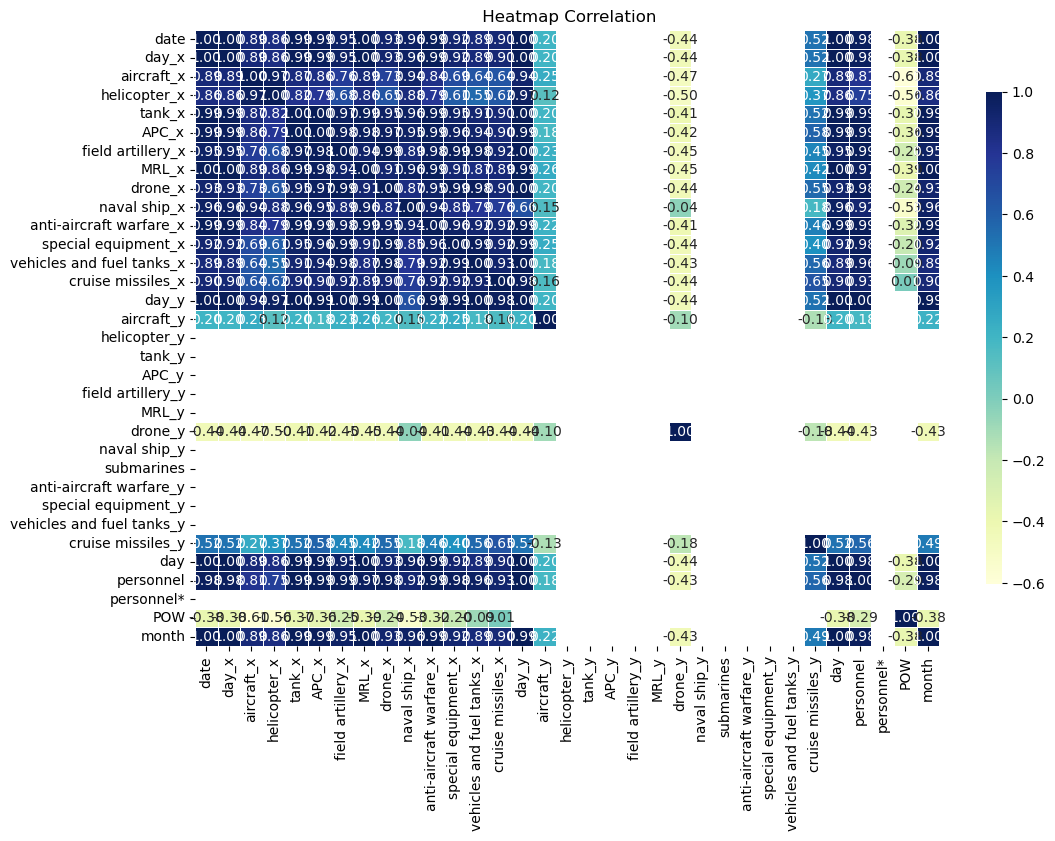

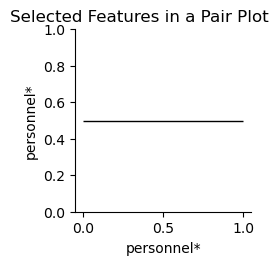

In [16]:
# Doing Exploratory Data Analysis (EDA)
# Determine that the [Date] column is formatted in datetime
data_combined['date'] = pd.to_datetime(data_combined['date'])
data_combined['month'] = data_combined['date'].dt.to_period('M')

# For charting, converting the [month] column to a string & then back to datetime
data_combined['month'] = data_combined['month'].astype(str)
data_combined['month'] = pd.to_datetime(data_combined['month'])

# Characteristic statistics
print("Characteristic statistics:")
print(data_combined.describe())

# Total losses over a period of time
if 'tank' in data_combined.columns and 'personnel*' in data_combined.columns:
    # Plotting the graph for Data Visualisation
    plt.figure(figsize=(12, 6))
    plt.plot(data_combined['date'], data_combined['personnel*'], label='Personnel Losses', color='maroon')
    plt.plot(data_combined['date'], data_combined['tank'], label='Tank Losses', color='violet')
    plt.title('Over Time Losses')
    plt.xlabel('Date')
    plt.ylabel('Total Losses')
    plt.legend()
    plt.xticks(rotation=42)
    plt.show()
else:
    print("Necessary columns ('tank', 'personnel*') are absent from the dataset.")

# Counting of categorical variable frequencies & plotting the data visualisation
equipment_columns = ['aircraft', 'tank', 'drone']
available_equipment_columns = [col for col in equipment_columns if col in data_combined.columns]
if available_equipment_columns:
    equipment_type_counts = data_combined[available_equipment_columns].sum()
    plt.figure(figsize=(10, 6))
    equipment_type_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title('Overall Losses by Type of Equipment')
    plt.ylabel('Total Losses')
    plt.xlabel('Type of Equipment ')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("There are no columns of equipment accessible for frequency analysis.")

# Sorting the data by month to identify patterns by accessing data types & grouping
numeric_columns = data_combined.select_dtypes(include='number').columns
monthly_losses = data_combined.groupby('month')[numeric_columns].sum()

# Plotting monthly trends by taking personnel*
if 'personnel*' in monthly_losses.columns and 'tank' in monthly_losses.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_losses.index, monthly_losses['personnel*'], label='Personnel Losses', color='brown')
    plt.plot(monthly_losses.index, monthly_losses['tank'], label='Tank Losses', color='orange')
    plt.title('Trends in Monthly Losses')
    plt.xlabel('Months')
    plt.ylabel('Overall Losses')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns ('personnel*', 'tank') are not stored in the monthly combined data.")

# Extra graphs for understanding & more insights
# Correlation heatmap for the given data graph
plt.figure(figsize=(12, 8))
sns.heatmap(data_combined.corr(),annot=True, cmap='YlGnBu',  fmt='.2f', linewidths=0.5,  annot_kws={"size": 10},cbar_kws={"shrink": 0.8, "aspect": 30})
plt.title(' Heatmap Correlation')
plt.show()

# Plotting in pairs for certain number columns
selected_columns = ['personnel*', 'tank', 'aircraft', 'drone']
available_selected_columns = [col for col in selected_columns if col in data_combined.columns]
if available_selected_columns:
    sns.pairplot(data_combined[available_selected_columns])
    plt.suptitle('Selected Features in a Pair Plot', y=1.02)
    plt.show()
else:
    print("No chosen numerical columns are accessible for analysis in pair plots.")

#It is now possible to save the integrated and cleaned data to a database or CSV file
output_path = 'final_cleaned_data.csv'
data_combined.to_csv(output_path, index=False)

### EXPLANATION:-
This code analyzes a merged dataset using **Exploratory Data Analysis (EDA)**. It starts by extracting monthly data and turning the date column into a datetime format. Frequency counts for equipment losses, trends in monthly losses, and a visual representation of overall losses over time are important assessments. Additionally, for the some other Insights pair plots and a correlation heatmap are created to reveal correlations between variables. Finally, the cleaned data is stored for later use in a CSV file.

Total Losses - Tanks: 105867552, Aircraft: 6563025, Drones: 132403635
Average Daily Losses - Tanks: 4819.61, Aircraft: 298.78, Drones: 6027.66


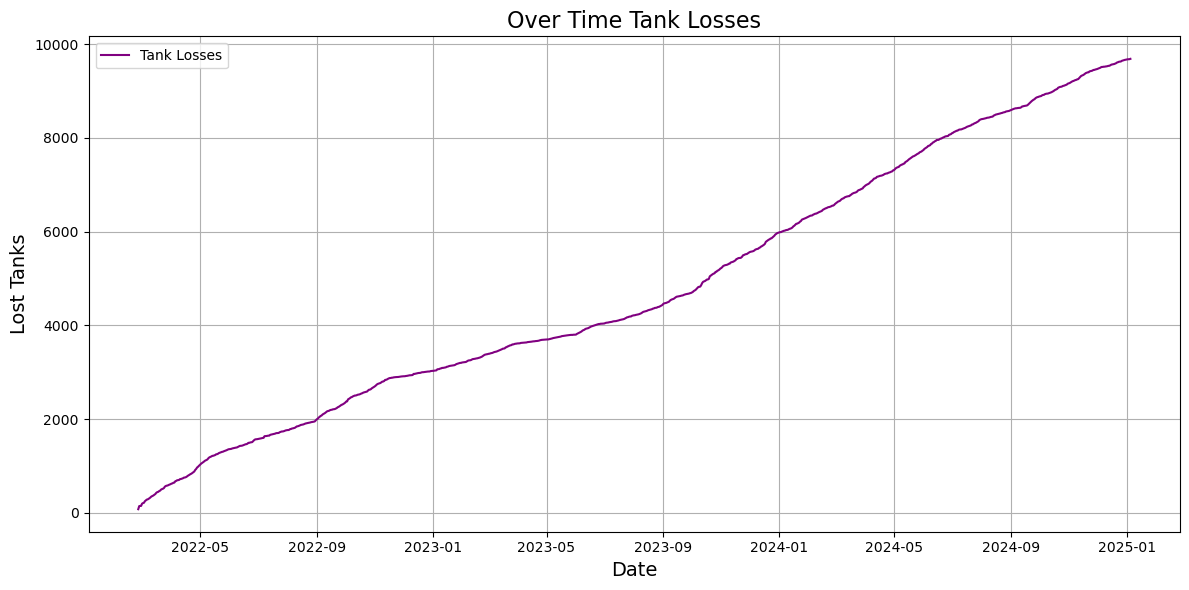

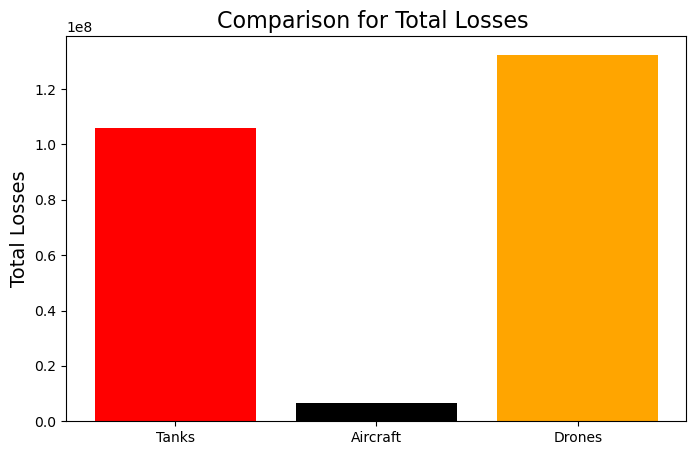

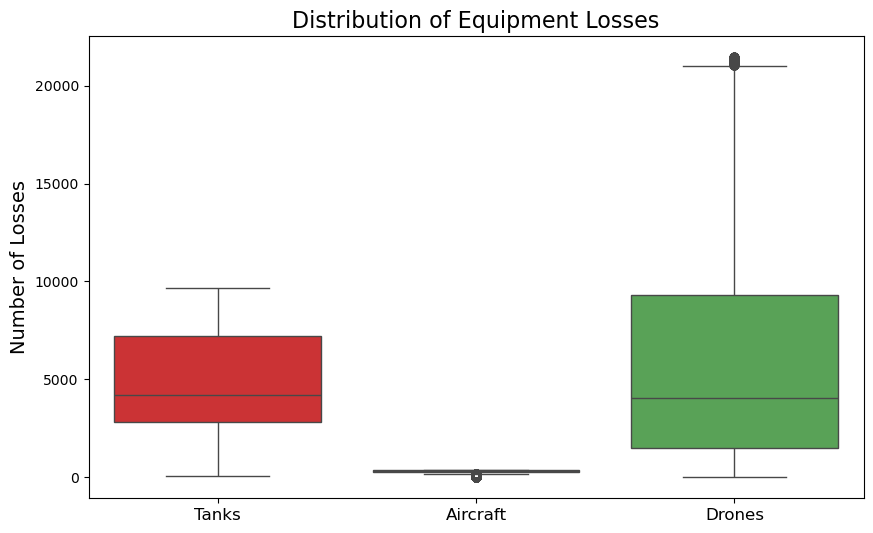

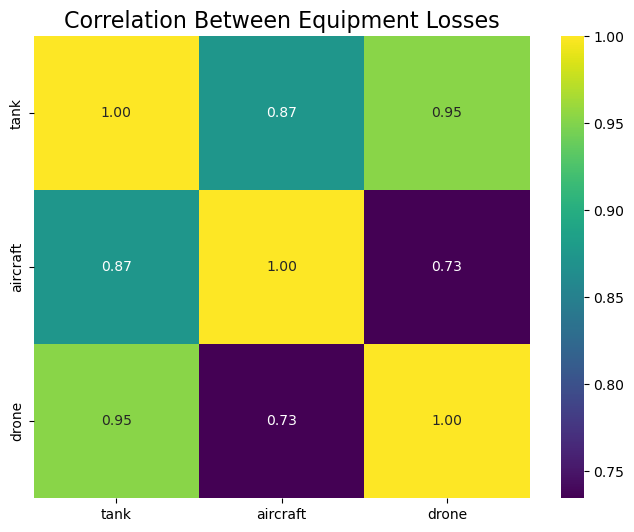

In [18]:
# Connecting to the SQLite Database 
conn = sqlite3.connect('Kishore_Gollahalli Suresha_ 240620181.db')
cursor = conn.cursor()

# EXPLORATORY DATA ANALYSIS 
# 1) Total Impact to Drones, Tanks, and Aircraft
cursor.execute('''
SELECT 
    SUM(tank) AS total_tank,
    SUM(aircraft) AS total_aircraft,
    SUM(drone) AS total_drone
FROM Russia_Losses_Equipment;
''')
total_losses = cursor.fetchone()
print(f"Total Losses - Tanks: {total_losses[0]}, Aircraft: {total_losses[1]}, Drones: {total_losses[2]}")

# 2) Average Daily Losses
cursor.execute('''
SELECT 
    AVG(tank) AS avg_tank,
    AVG(aircraft) AS avg_aircraft,
    AVG(drone) AS avg_drone
FROM Russia_Losses_Equipment;
''')
avg_losses = cursor.fetchone()
print(f"Average Daily Losses - Tanks: {avg_losses[0]:.2f}, Aircraft: {avg_losses[1]:.2f}, Drones: {avg_losses[2]:.2f}")

# 3) Analysis of Trends in Tank Losses Over Time
tank_trend_query = '''
SELECT 
    date, 
    tank 
FROM Russia_Losses_Equipment 
ORDER BY date;
'''
tank_trend = pd.read_sql_query(tank_trend_query, conn)

# DATA VISUALIZATION 
# 1. Line Graph: Time-Series Tank Losses
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(tank_trend['date']), tank_trend['tank'], label='Tank Losses', color='purple')
plt.title("Over Time Tank Losses", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Lost Tanks", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Bar Chart: Comparison of Total Losses
categories = ['Tanks', 'Aircraft', 'Drones']
totals = [total_losses[0], total_losses[1], total_losses[2]]

#Plotting the bar chart for total losses
plt.figure(figsize=(8, 5))
plt.bar(categories, totals, color=['red', 'black', 'orange'])
plt.title("Comparison for Total Losses ", fontsize=16)
plt.ylabel("Total Losses", fontsize=14)
plt.show()

# 3. Box Plot: Equipment Loss Distribution
loss_data_query = '''
SELECT 
    tank, 
    aircraft, 
    drone 
FROM Russia_Losses_Equipment;
'''
loss_data = pd.read_sql_query(loss_data_query, conn)

plt.figure(figsize=(10, 6))
sns.boxplot(data=loss_data, palette="Set1")
plt.title("Distribution of Equipment Losses", fontsize=16)
plt.ylabel("Number of Losses", fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['Tanks', 'Aircraft', 'Drones'], fontsize=12)
plt.show()

# 4. Heatmap: Loss Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(loss_data.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Between Equipment Losses", fontsize=16)
plt.show()

# Closing the database connection
conn.close()

### EXPLANATION:-
This code analyzes and displays **Equipment losses** data by connecting to a SQLite database. Total and average daily losses for tanks, airplanes, and drones are important analyses. A bar chart compares overall losses across categories, and a line graph shows trends in tank losses over time. The distribution of losses for each type of equipment is shown in a box plot, and relationships between losses are shown in a heatmap. For a detailed EDA, this study combines Python visualization tools with SQL queries.

## Additional Insights for the DataSets by doing Exploratory Data Analysis(EDA) & Data Visualization

Daily Tank Change:
          date  tank  daily_tank_change
0  2022-02-25    80                 80
1  2022-02-25    80                  0
2  2022-02-25    80                  0
3  2022-02-25    80                  0
4  2022-02-25    80                  0


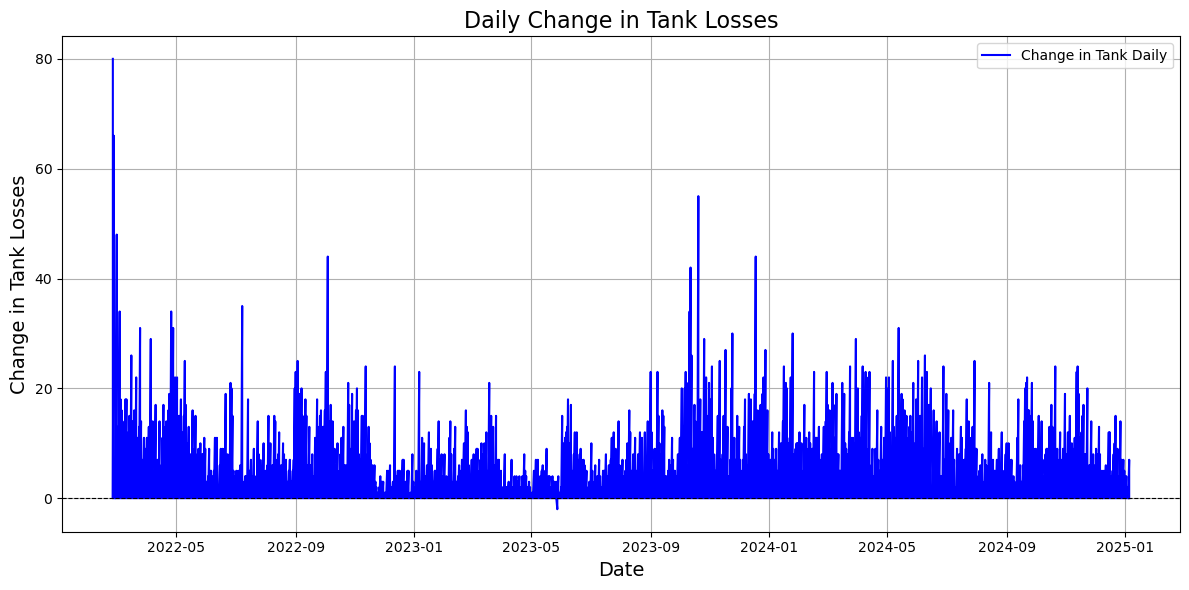

The number of days with major tank losses (>50): 21966
Average Ratio of Tank-to-Aircraft Losses : 14.91
Average Loss Ratio from Tank to Drone : 2.68
Monthly Trends:
      month  monthly_tank_losses  monthly_aircraft_losses  monthly_drone_losses
0  2022-02                11046                     1953                   147
1  2022-03               272958                    51912                 16254
2  2022-04               493038                   103446                 92337
3  2022-05               791973                   130977                269976
4  2022-06               915684                   134652                370398


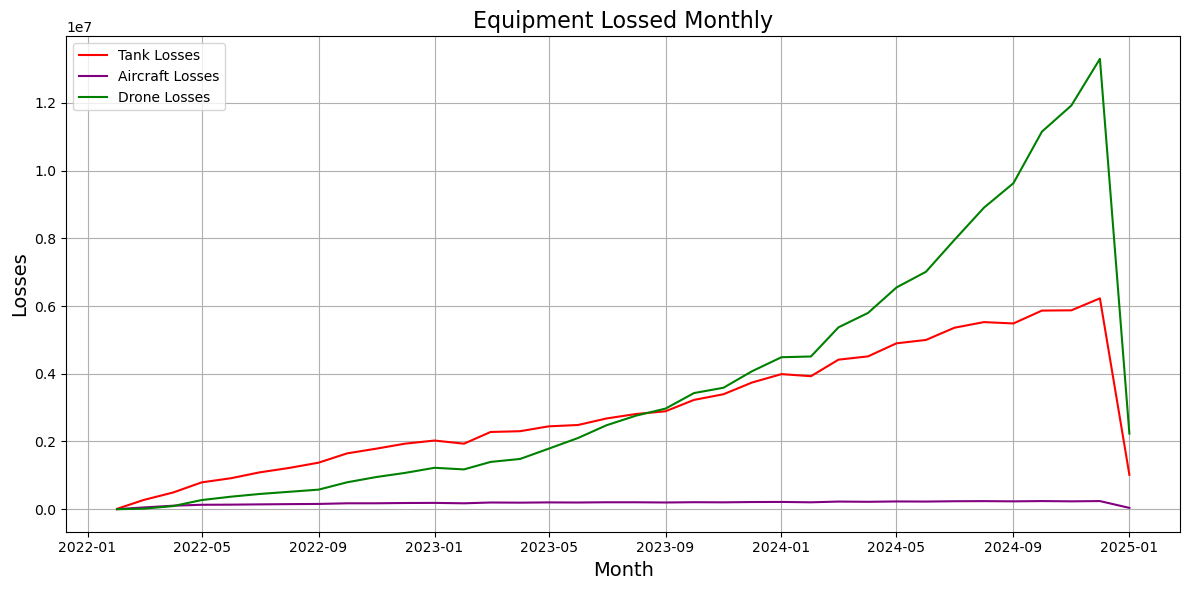

Sample of Correlation Data :
    tank  aircraft  drone personnel_losses
0  9686       369  21447             None
1  9686       369  21447             None
2  9686       369  21447             None
3  9686       369  21447             None
4  9686       369  21447             None


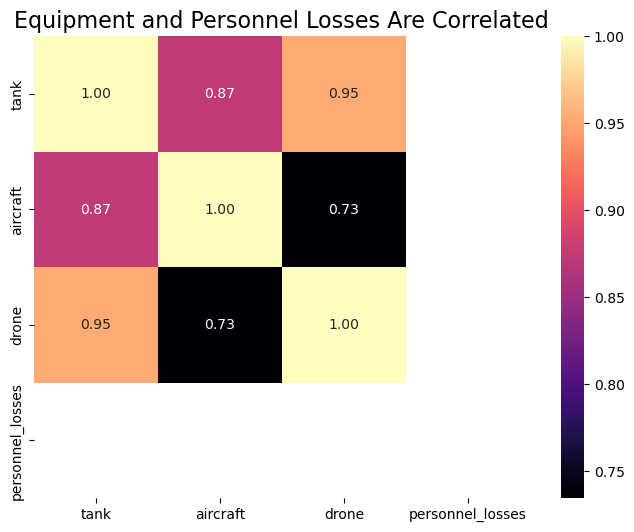

Tasks related to EDA and visualization are finished!!!


In [21]:
# Connection to the SQLite database
conn = sqlite3.connect('Kishore_Gollahalli Suresha_ 240620181.db')
cursor = conn.cursor()

# ADDITIONAL INSIGHTS

# 1) Changing in the Tank Losses Every Day
daily_change_query = '''
SELECT 
    date,
    tank,
    tank - LAG(tank, 1, 0) OVER (ORDER BY date) AS daily_tank_change
FROM Russia_Losses_Equipment;
'''
daily_change = pd.read_sql_query(daily_change_query, conn)
print("Daily Tank Change:\n", daily_change.head())

# Line Graph: Tank Losses Changed Daily
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(daily_change['date']), daily_change['daily_tank_change'], label='Change in Tank Daily', color='blue')
plt.title("Daily Change in Tank Losses", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Change in Tank Losses", fontsize=14)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Zero line
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Regularity of Considerable Losses
significant_tank_query = '''
SELECT 
    COUNT(*) AS days_with_high_tank_losses
FROM Russia_Losses_Equipment
WHERE tank > 50;
'''
cursor.execute(significant_tank_query)
significant_days = cursor.fetchone()[0]
print(f"The number of days with major tank losses (>50): {significant_days}")

# 3) Ratios of equipment loss
loss_ratio_query = '''
SELECT 
    AVG(CAST(tank AS FLOAT) / NULLIF(aircraft, 0)) AS avg_tank_to_aircraft_ratio,
    AVG(CAST(tank AS FLOAT) / NULLIF(drone, 0)) AS avg_tank_to_drone_ratio
FROM Russia_Losses_Equipment;
'''
cursor.execute(loss_ratio_query)
loss_ratios = cursor.fetchone()
print(f"Average Ratio of Tank-to-Aircraft Losses : {loss_ratios[0]:.2f}")
print(f"Average Loss Ratio from Tank to Drone : {loss_ratios[1]:.2f}")

# 4) Trends from Month to Month
monthly_trends_query = '''
SELECT 
    strftime('%Y-%m', date) AS month,
    SUM(tank) AS monthly_tank_losses,
    SUM(aircraft) AS monthly_aircraft_losses,
    SUM(drone) AS monthly_drone_losses
FROM Russia_Losses_Equipment
GROUP BY month
ORDER BY month;
'''
monthly_trends = pd.read_sql_query(monthly_trends_query, conn)
print("Monthly Trends:\n", monthly_trends.head())

# Line Graph:Trends in Monthly
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(monthly_trends['month']), monthly_trends['monthly_tank_losses'], label='Tank Losses', color='red')
plt.plot(pd.to_datetime(monthly_trends['month']), monthly_trends['monthly_aircraft_losses'], label='Aircraft Losses', color='purple')
plt.plot(pd.to_datetime(monthly_trends['month']), monthly_trends['monthly_drone_losses'], label='Drone Losses', color='green')
plt.title("Equipment Lossed Monthly", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Losses", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5) Association with Losses in Personnel
correlation_query = '''
SELECT 
    e.tank, 
    e.aircraft, 
    e.drone, 
    p.personnel_losses
FROM Russia_Losses_Equipment e
JOIN Russia_Losses_Personnel p
ON e.date = p.date;
'''
correlation_data = pd.read_sql_query(correlation_query, conn)
print("Sample of Correlation Data :\n", correlation_data.head())

# Heatmap: Equipment and Personnel Losses Are Correlated
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Equipment and Personnel Losses Are Correlated", fontsize=16)
plt.show()

# ANALYZING RESULTS
print("Tasks related to EDA and visualization are finished!!!")

# Closing the database connection
conn.close()

### EXPLANATION:-
A SQLite database containing the missing dataset is subjected to more exploratory data analysis (EDA) by the code. It computes average ratios between tank and other equipment losses, analyzes monthly trends in equipment losses, and computes and visualizes daily variations in tank losses. It also identifies days with major tank losses more than 50. In order to better understand the linkages between equipment and manpower losses, it also uses a heatmap to assess the association between the two. Heatmaps, bar charts, and line graphs are used to illustrate the results in order to highlight trends and patterns.

Days of Peak Loss:
          date  max_tank_losses  max_aircraft_losses  max_drone_losses
0  2022-02-25               80                   10                 0
1  2022-02-26              146                   27                 2
2  2022-02-27              150                   27                 2
3  2022-02-28              150                   29                 3
4  2022-03-01              198                   29                 3


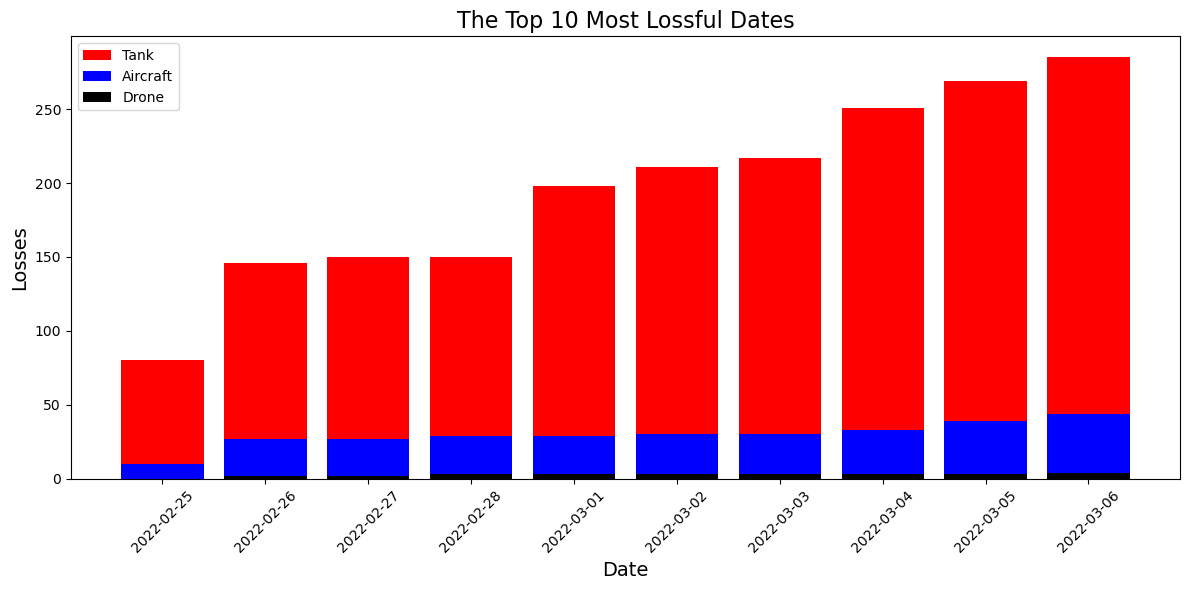

Proportion of Tank Loss: 51.94%
Proportion of Aircraft Losses: 4.82%
Drone Loss Ratio: 43.25%


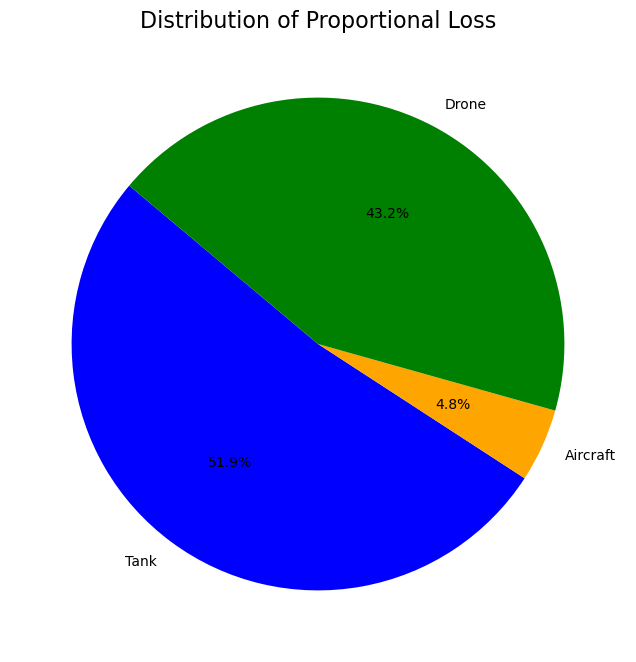

Cumulative Losses:
          date  cumulative_tank_losses  cumulative_aircraft_losses  \
0  2022-02-25                    1680                         210   
1  2022-02-25                    1680                         210   
2  2022-02-25                    1680                         210   
3  2022-02-25                    1680                         210   
4  2022-02-25                    1680                         210   

   cumulative_drone_losses  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  


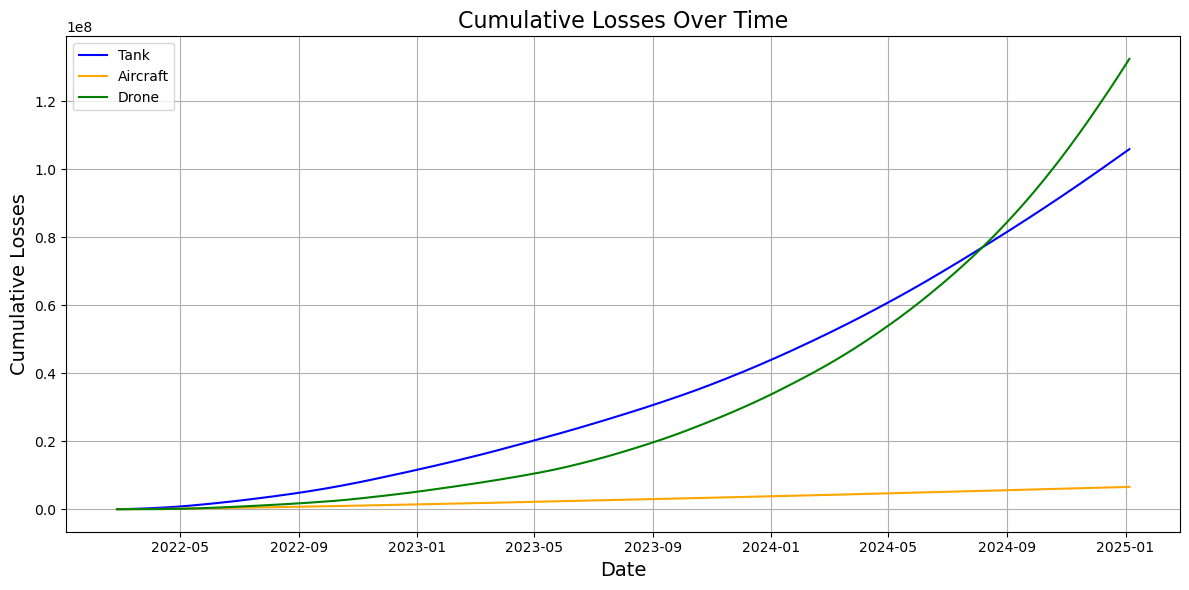

Average Losses by Weekday:
      weekday  avg_tank_losses  avg_aircraft_losses  avg_drone_losses
0     Sunday      4829.106667           298.773333       6066.973333
1     Monday      4805.167785           298.583893       5984.100671
2    Tuesday      4814.986577           298.906040       6002.315436
3  Wednesday      4823.516779           299.234899       6023.000000
4   Thursday      4833.040268           299.530201       6045.140940
5     Friday      4811.040000           298.053333       6025.533333
6   Saturday      4820.400000           298.393333       6046.200000


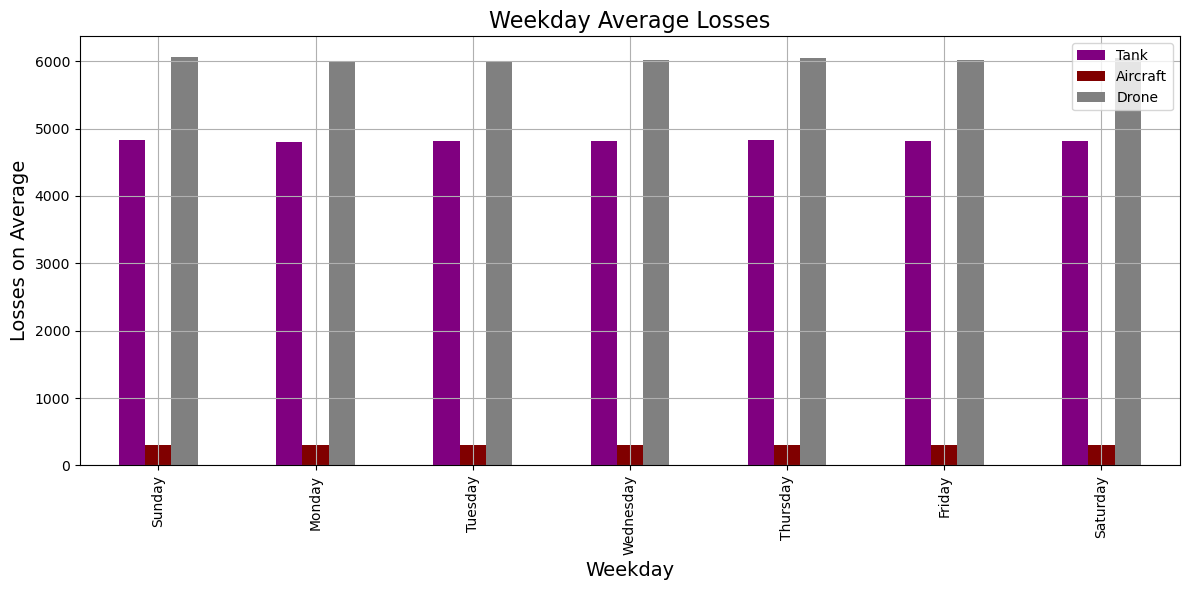

Equipment to Personnel Ratios:
         date  personnel_to_equipment_ratio
0 2025-01-05                           0.0
1 2025-01-05                           0.0
2 2025-01-05                           0.0
3 2025-01-05                           0.0
4 2025-01-05                           0.0


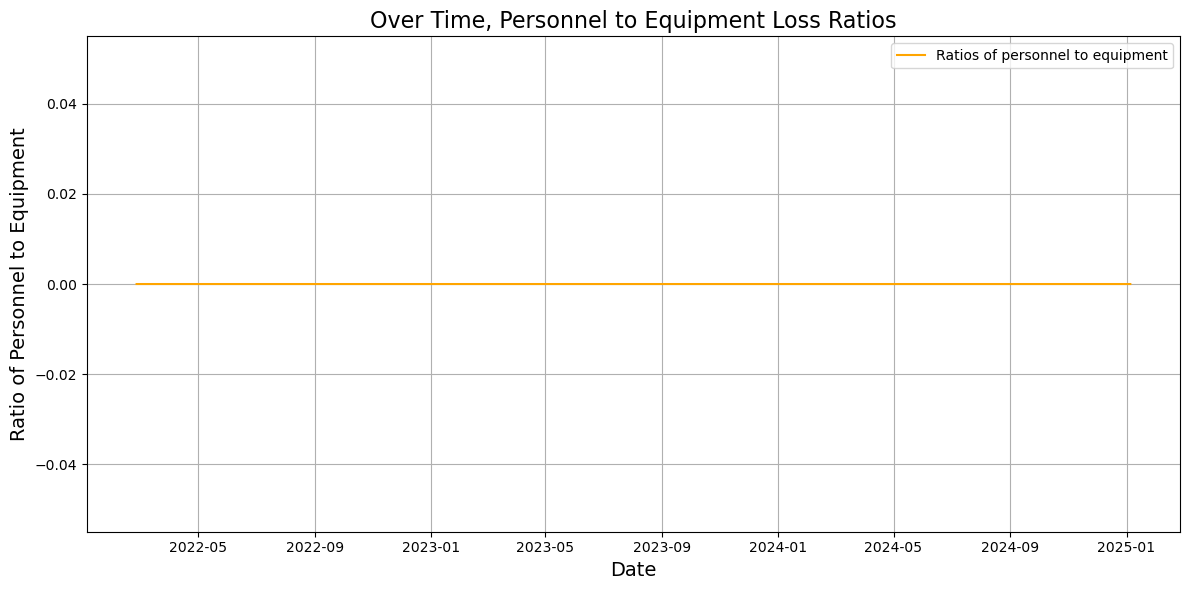

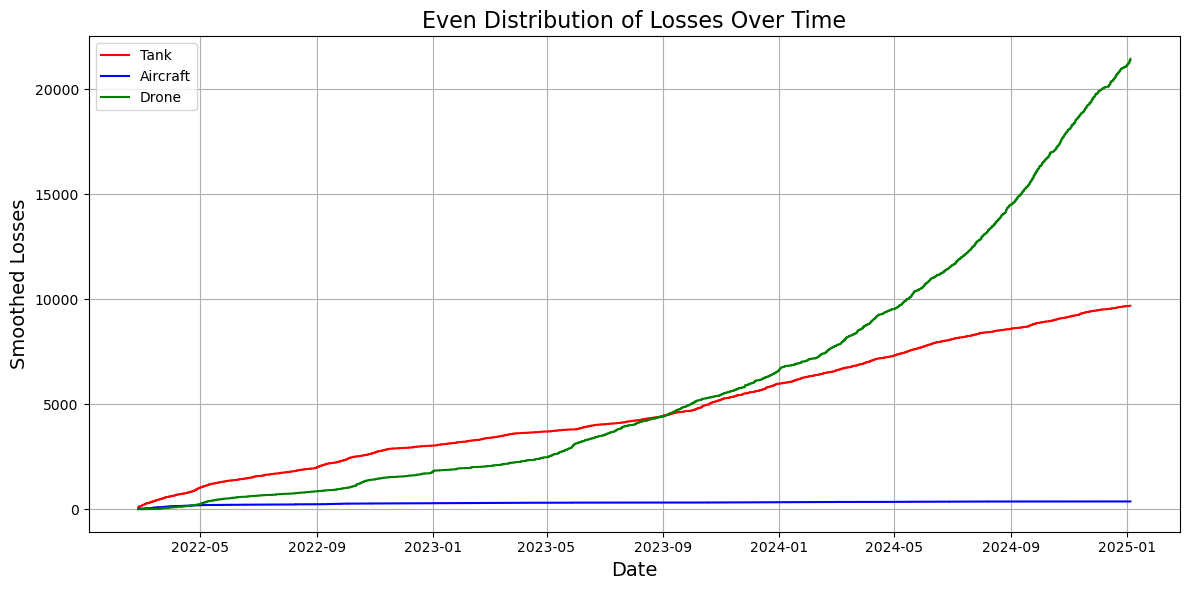

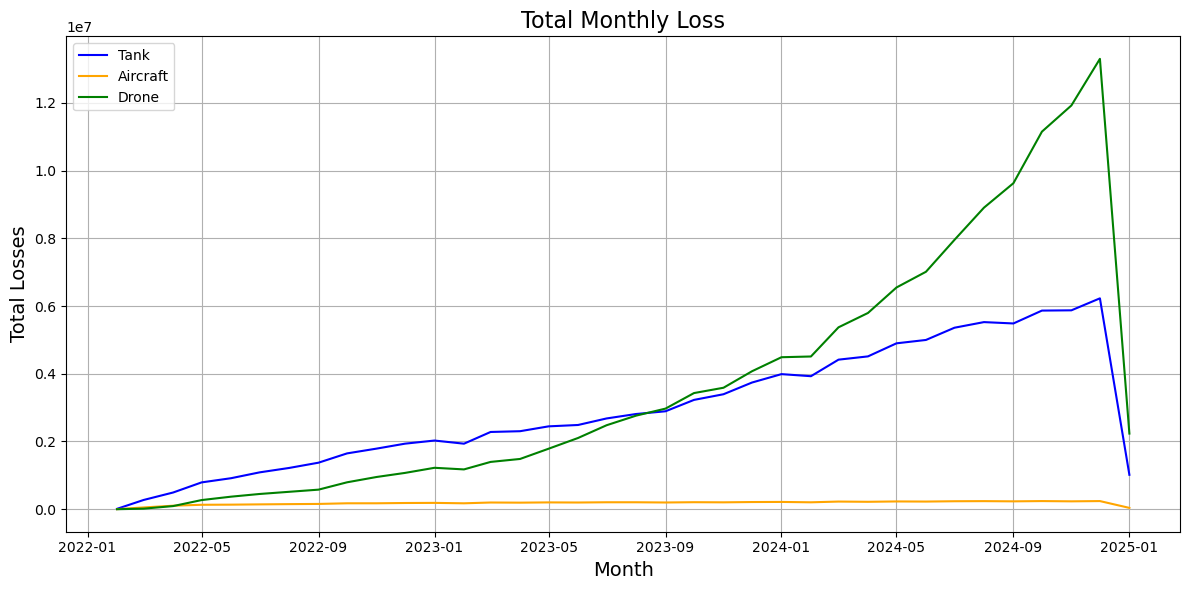

Correlation Matrix:
               tank  aircraft     drone
tank      1.000000  0.873918  0.953284
aircraft  0.873918  1.000000  0.734408
drone     0.953284  0.734408  1.000000


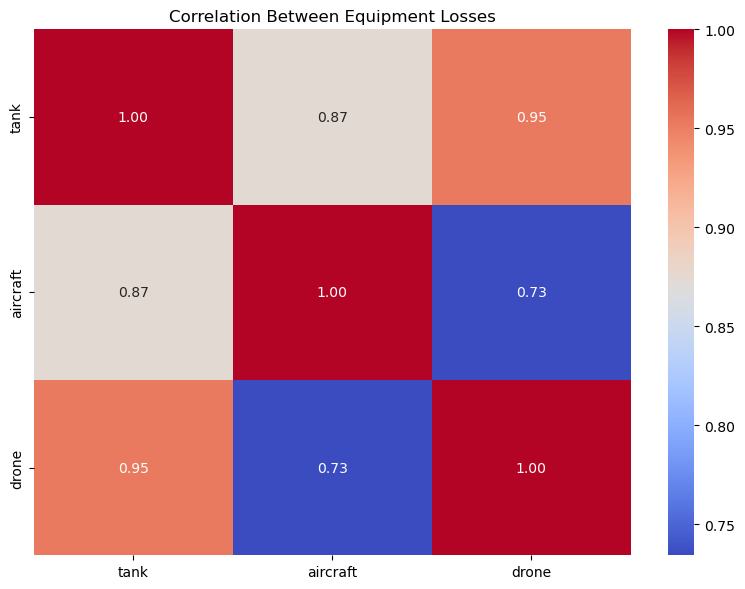

In [23]:
# Connecting to the SQLite database of russia losses
conn = sqlite3.connect('Kishore_Gollahalli Suresha_ 240620181.db')

# 1. Days of Peak Loss
peak_loss_query = '''
SELECT 
    date,
    MAX(tank) AS max_tank_losses,
    MAX(aircraft) AS max_aircraft_losses,
    MAX(drone) AS max_drone_losses
FROM Russia_Losses_Equipment
GROUP BY date
ORDER BY date;
'''
peak_losses = pd.read_sql_query(peak_loss_query, conn)
print("Days of Peak Loss:\n", peak_losses.head())

# Bar Chart: Days of Peak Loss
plt.figure(figsize=(12, 6))
plt.bar(peak_losses['date'][:10], peak_losses['max_tank_losses'][:10], label='Tank', color='red')
plt.bar(peak_losses['date'][:10], peak_losses['max_aircraft_losses'][:10], label='Aircraft', color='blue')
plt.bar(peak_losses['date'][:10], peak_losses['max_drone_losses'][:10], label='Drone', color='black')
plt.title("The Top 10 Most Lossful Dates", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Losses", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Distribution of Proportional Losses
loss_proportion_query = '''
SELECT 
    AVG(CAST(tank AS FLOAT) / (tank + aircraft + drone)) * 100 AS tank_percent,
    AVG(CAST(aircraft AS FLOAT) / (tank + aircraft + drone)) * 100 AS aircraft_percent,
    AVG(CAST(drone AS FLOAT) / (tank + aircraft + drone)) * 100 AS drone_percent
FROM Russia_Losses_Equipment;
'''
cursor = conn.cursor()
cursor.execute(loss_proportion_query)
proportions = cursor.fetchone()
print(f"Proportion of Tank Loss: {proportions[0]:.2f}%")
print(f"Proportion of Aircraft Losses: {proportions[1]:.2f}%")
print(f"Drone Loss Ratio: {proportions[2]:.2f}%")

# Pie Chart: Proportion of Losses
plt.figure(figsize=(8, 8))
plt.pie(
    [proportions[0], proportions[1], proportions[2]],
    labels=['Tank', 'Aircraft', 'Drone'],
    autopct='%1.1f%%',
    colors=['blue', 'orange', 'green'],
    startangle=140
)
plt.title("Distribution of Proportional Loss", fontsize=16)
plt.show()

# 3. Total Losses Over Time
cumulative_query = '''
SELECT 
    date,
    SUM(tank) OVER (ORDER BY date) AS cumulative_tank_losses,
    SUM(aircraft) OVER (ORDER BY date) AS cumulative_aircraft_losses,
    SUM(drone) OVER (ORDER BY date) AS cumulative_drone_losses
FROM Russia_Losses_Equipment;
'''
cumulative_losses = pd.read_sql_query(cumulative_query, conn)
print("Cumulative Losses:\n", cumulative_losses.head())

# Line Graph: Total Losses Over Time
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(cumulative_losses['date']), cumulative_losses['cumulative_tank_losses'], label='Tank', color='blue')
plt.plot(pd.to_datetime(cumulative_losses['date']), cumulative_losses['cumulative_aircraft_losses'], label='Aircraft', color='orange')
plt.plot(pd.to_datetime(cumulative_losses['date']), cumulative_losses['cumulative_drone_losses'], label='Drone', color='green')
plt.title("Cumulative Losses Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Losses", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Ratios of Losses by Weekday
weekday_query = '''
SELECT 
    strftime('%w', date) AS weekday, -- '0' for Sunday, '6' for Saturday
    AVG(tank) AS avg_tank_losses,
    AVG(aircraft) AS avg_aircraft_losses,
    AVG(drone) AS avg_drone_losses
FROM Russia_Losses_Equipment
GROUP BY weekday
ORDER BY weekday;
'''
weekday_losses = pd.read_sql_query(weekday_query, conn)
weekday_map = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_losses['weekday'] = weekday_losses['weekday'].astype(int).map(lambda x: weekday_map[x])
print("Average Losses by Weekday:\n", weekday_losses)

# Bar Chart: Weekday Losses
weekday_losses.plot(x='weekday', kind='bar', figsize=(12, 6), color=['purple', 'maroon', 'grey'])
plt.title("Weekday Average Losses", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Losses on Average", fontsize=14)
plt.legend(["Tank", "Aircraft", "Drone"])
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Ratios of Personnel to Equipment Losses
loss_ratio_query = '''
SELECT 
    e.date,
    CASE 
        WHEN (e.tank + e.aircraft + e.drone) > 0 THEN 
            CAST(p.personnel_losses AS FLOAT) / (e.tank + e.aircraft + e.drone)
        ELSE NULL 
    END AS personnel_to_equipment_ratio
FROM Russia_Losses_Equipment e
JOIN Russia_Losses_Personnel p
ON e.date = p.date;
'''
personnel_to_equipment = pd.read_sql_query(loss_ratio_query, conn)

# Plotting with missing or NULL values
personnel_to_equipment['personnel_to_equipment_ratio'] = (personnel_to_equipment['personnel_to_equipment_ratio'].apply(lambda x: 0 if pd.isna(x) else x).astype(float))

# To plot, convert a date to a datetime
personnel_to_equipment['date'] = pd.to_datetime(personnel_to_equipment['date'])

# Print the result's initial few row
print("Equipment to Personnel Ratios:\n", personnel_to_equipment.head())

# Line Graph: Ratios of personnel to equipment
plt.figure(figsize=(12, 6))
plt.plot(
    personnel_to_equipment['date'], 
    personnel_to_equipment['personnel_to_equipment_ratio'], 
    color='orange', 
    label='Ratios of personnel to equipment')
plt.title("Over Time, Personnel to Equipment Loss Ratios", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Ratio of Personnel to Equipment", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 6.Even Distribution of Losses Over Time
equipment_trend_query = '''
SELECT 
    date,
    AVG(tank) OVER (ORDER BY date ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS smoothed_tank_losses,
    AVG(aircraft) OVER (ORDER BY date ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS smoothed_aircraft_losses,
    AVG(drone) OVER (ORDER BY date ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS smoothed_drone_losses
FROM Russia_Losses_Equipment
'''
trend_data = pd.read_sql_query(equipment_trend_query, conn)

# Plotting the ternd of smoothed
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(trend_data['date']), trend_data['smoothed_tank_losses'], label='Tank', color='red')
plt.plot(pd.to_datetime(trend_data['date']), trend_data['smoothed_aircraft_losses'], label='Aircraft', color='blue')
plt.plot(pd.to_datetime(trend_data['date']), trend_data['smoothed_drone_losses'], label='Drone', color='green')
plt.title("Even Distribution of Losses Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Smoothed Losses", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7.Monthly Total Losses
monthly_losses_query = '''
SELECT 
    strftime('%Y-%m', date) AS month,
    SUM(tank) AS total_tank_losses,
    SUM(aircraft) AS total_aircraft_losses,
    SUM(drone) AS total_drone_losses
FROM Russia_Losses_Equipment
GROUP BY month
ORDER BY month;
'''
monthly_losses = pd.read_sql_query(monthly_losses_query, conn)

# Charting the monthly sums
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(monthly_losses['month']), monthly_losses['total_tank_losses'], label='Tank', color='blue')
plt.plot(pd.to_datetime(monthly_losses['month']), monthly_losses['total_aircraft_losses'], label='Aircraft', color='orange')
plt.plot(pd.to_datetime(monthly_losses['month']), monthly_losses['total_drone_losses'], label='Drone', color='green')
plt.title("Total Monthly Loss", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Losses", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8.Association of Equipment Losses
correlation_query = '''
SELECT 
    tank, 
    aircraft, 
    drone
FROM Russia_Losses_Equipment;
'''
correlation_data = pd.read_sql_query(correlation_query, conn)
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Making a Correlation Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Equipment Losses")
plt.tight_layout()
plt.show()

# Closing the connection to the database
conn.close()

### EXPLANATION:-
Numerous analysis of the losses are carried out by this code, which links to a SQLite database that contains Russian military loss data. These analyses include weekly loss trends, proportionate losses by equipment type, cumulative losses over time, and peak loss days. Bar charts, line graphs, pie charts, and heatmaps are then used to visualize these analyses. Additionally, the code calculates and displays relationships between monthly trends and equipment losses. When the analysis and visualization duties are finished, it finally terminates the database connection.